In [ ]:
%cd ..

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from gensim.models import Word2Vec

### 5y splits

In [ ]:
# Load the model (replace X with 1, 2, or 3 as needed)
wave_1 = Word2Vec.load('../5ysplits_models/diachronic_wave_1_processed_model.bin')
wave_2 = Word2Vec.load('../5ysplits_models/diachronic_wave_2_processed_model.bin')
wave_3 = Word2Vec.load('../5ysplits_models/diachronic_wave_3_processed_model.bin')
wave_4 = Word2Vec.load('../5ysplits_models/diachronic_wave_4_processed_model.bin')
wave_5 = Word2Vec.load('../5ysplits_models/diachronic_wave_5_processed_model.bin')

waves_5 = [wave_1, wave_2, wave_3, wave_4, wave_5]

### t-SNE

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import gensim.downloader as api

# Pick a few semantic groups
words = [
    'kralj_noun', 'kraljica_noun', 'muškarac_noun', 'žena_noun', 
    'pariz_noun', 'francuska_noun', 'rim_noun', 'italija_noun',
    'jabuka_noun', 'banana_noun', 'voće_noun', 'naranča_noun',
    'pas_noun', 'mačka_noun', 'životinja_noun', 'ljubimac_noun',
    'auto_noun', 'bicikl_noun', 'motor_noun', 'vozilo_noun',
    'kuća_noun', 'stan_noun', 'zgrada_noun', 'dom_noun'
]

def plot_tsne(model, words):
    # Get vectors for the selected words
    vectors = np.array([model.wv[word] for word in words])

    # Reduce dimensions to 2D with t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    embeddings_2d = tsne.fit_transform(vectors)

    # Plot with seaborn
    plt.figure(figsize=(10, 8))
    sns.set(style="whitegrid")

    for i, word in enumerate(words):
        x, y = embeddings_2d[i]
        plt.scatter(x, y)
        plt.text(x + 0.55, y + 0.55, word, fontsize=12)

    plt.title("t-SNE Visualization of Word2Vec Embeddings")
    plt.show()

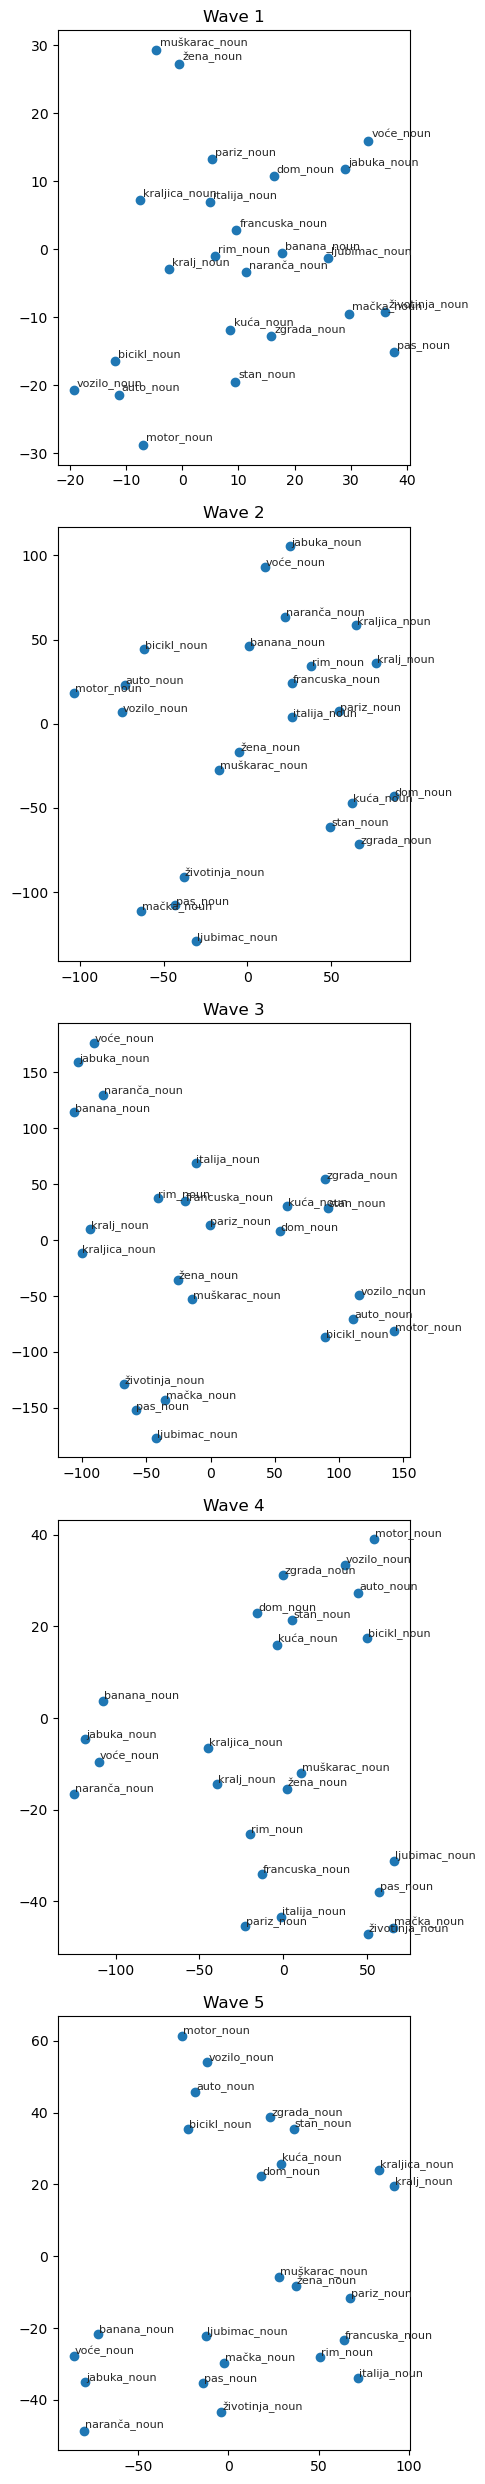

In [5]:
fig, axes = plt.subplots(5, 1, figsize=(5, 25), sharex=False, sharey=False)

for i, (wave, ax) in enumerate(zip(waves_5, axes)):
    # Get vectors for the selected words
    vectors = np.array([wave.wv[word] for word in words])

    # Reduce dimensions to 2D with t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    embeddings_2d = tsne.fit_transform(vectors)

    # Plot with seaborn
    sns.set(style="whitegrid")
    ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

    for j, word in enumerate(words):
        x, y = embeddings_2d[j]
        ax.text(x + 0.55, y + 0.55, word, fontsize=8)

    ax.set_title(f"Wave {i + 1}")

plt.tight_layout()
plt.show()

In [6]:
def get_most_similar_words(model, word, topn=10):
    """
    Get the most similar words to a given word in the model.
    
    Parameters:
    - model: The Word2Vec model.
    - word: The target word.
    - topn: Number of similar words to return.
    
    Returns:
    - List of tuples (word, similarity score).
    """
    try:
        similar_words = model.wv.most_similar(word, topn=topn)
        print(f"Most similar words to '{word}':")
        for similar_word, score in similar_words:
            print(f"{similar_word}: {score:.4f}")
    except KeyError:
        print(f"Word '{word}' not found in the model vocabulary.")
        return

def get_most_similar_words_all_waves(word):
    """
    Get the most similar words for a given word across all waves.
    
    Parameters:
    - word: The target word.
    """
    for i, wave in enumerate(waves_5):
        print(f"Wave {i + 1}:")
        get_most_similar_words(wave, word)
        print("\n")

In [7]:
get_most_similar_words_all_waves('ukrajina_noun')

Wave 1:
Most similar words to 'ukrajina_noun':
argentin_propn: 0.8842
lihtenštajn_propn: 0.8796
maltu_propn: 0.8754
venecuela_propn: 0.8717
ekvadora_propn: 0.8713
vaduzu_propn: 0.8712
cipr_propn: 0.8705
ukrajinci_propn: 0.8682
nigeri_noun: 0.8679
francuskom_propn: 0.8679


Wave 2:
Most similar words to 'ukrajina_noun':
jehanurov_propn: 0.8045
kuprijanov_propn: 0.7904
ukrajina_propn: 0.7818
naftogaz_propn: 0.7797
ukrajin_propn: 0.7772
juščenk_propn: 0.7697
rusija_propn: 0.7674
minsk_propn: 0.7665
ukrajincima_noun: 0.7651
zelenski_propn: 0.7626


Wave 3:
Most similar words to 'ukrajina_noun':
ukrajina_propn: 0.8225
rusija_propn: 0.7454
ukrajinski_adj: 0.6867
kijev_propn: 0.6724
ukrajince_propn: 0.6601
ljviv_propn: 0.6560
ukrajincima_noun: 0.6544
heletej_propn: 0.6535
bjelorusija_propn: 0.6516
ukrajincin_propn: 0.6493


Wave 4:
Most similar words to 'ukrajina_noun':
ukrajina_propn: 0.7841
ukrajinski_adj: 0.6702
rusija_propn: 0.6649
kijev_propn: 0.6431
donbas_propn: 0.6154
porošenko_propn:

## Evaluation data

In [8]:
def read_file(file_path):
    """
    Read synonyms from a file and return them as a list.
    
    Parameters:
    - file_path: Path to the file containing synonyms.
    
    Returns:
    - List of synonyms.
    """
    with open(file_path, "r") as f:
        lines = f.readlines()
    return [line.strip() for line in lines]

### hr-synonym-choice

In [9]:
import random 

def append_pos_tags(syn_pairs, tag):
    for i, pair in enumerate(syn_pairs):
        syn_1, syn_2 = pair
        syn_pairs[i] = (syn_1 + '_' + tag, syn_2 + '_' + tag)
        
    return syn_pairs

def get_synonyms(syn_path, tag, sem_relation):
    """
    Get the synonyms from the hr-synonym-choice list.
    
    Parameters:
    - syn_list: List of strings containing synonyms.
    - tag: Part of speech tag to append to the synonyms.
    - sem_relation: Semantic relation ('synonym', OR 'not_related').
    
    Returns:
    - List of tuples (synonym_1, synonym_2).
    """

    syn_list = read_file(syn_path)
    syn_pairs = []
    for line in syn_list:
        stripped_line = line.split(':')

        syn_1 = stripped_line[0]
        answer_id = int(stripped_line[-1].replace('\n', ''))

        if sem_relation != 'synonym':
            answer_id =  random.choice(list(set(range(1, 5)) - {answer_id}))

        options = stripped_line[1:-1]
        syn_2 = options[answer_id-1]

        syn_pairs.append((syn_1 + '_' + tag, syn_2 + '_' + tag))
    
    return syn_pairs


In [10]:
syn_adj = get_synonyms('data/eval_data/hr-synonym-choice/hr-synonym-choice-A.txt', 'adj', 'synonym')
syn_noun = get_synonyms('data/eval_data/hr-synonym-choice/hr-synonym-choice-N.txt', 'noun', 'synonym')
syn_verb = get_synonyms('data/eval_data/hr-synonym-choice/hr-synonym-choice-V.txt', 'verb', 'synonym')

not_related_adj = get_synonyms('data/eval_data/hr-synonym-choice/hr-synonym-choice-A.txt', 'adj', 'not_related')
not_related_noun = get_synonyms('data/eval_data/hr-synonym-choice/hr-synonym-choice-N.txt', 'noun', 'not_related')
not_related_verb = get_synonyms('data/eval_data/hr-synonym-choice/hr-synonym-choice-V.txt', 'verb', 'not_related')          

In [11]:
syn_noun

[('autodidakt_noun', 'samouk_noun'),
 ('konformizam_noun', 'prilagodljivost_noun'),
 ('divan_noun', 'otoman_noun'),
 ('baza_noun', 'uporište_noun'),
 ('transpozicija_noun', 'premještaj_noun'),
 ('sirotinja_noun', 'mizerija_noun'),
 ('indikacija_noun', 'upućivanje_noun'),
 ('petrovac_noun', 'pop_noun'),
 ('rast_noun', 'stas_noun'),
 ('fešta_noun', 'svečanost_noun'),
 ('vodomjer_noun', 'sat_noun'),
 ('greš_noun', 'ogrozd_noun'),
 ('administracija_noun', 'vlast_noun'),
 ('ribež_noun', 'rende_noun'),
 ('priroda_noun', 'ćud_noun'),
 ('sotonizam_noun', 'užas_noun'),
 ('lemozina_noun', 'milodar_noun'),
 ('nevolja_noun', 'siromašak_noun'),
 ('pirka_noun', 'vukovac_noun'),
 ('težina_noun', 'ozbiljnost_noun'),
 ('solsticij_noun', 'suncostaj_noun'),
 ('ustanovljenje_noun', 'konstatacija_noun'),
 ('salinitet_noun', 'slanost_noun'),
 ('uzdignuće_noun', 'uzvišenje_noun'),
 ('brakteja_noun', 'zalistak_noun'),
 ('razred_noun', 'učionica_noun'),
 ('incizija_noun', 'rezbarija_noun'),
 ('top_noun', 'jedi

### CroSemRel450

In [12]:
import regex
import re

In [13]:
import spacy

# Load the spaCy model for POS tagging
nlp = spacy.load("hr_core_news_lg")

def recognize_pos_tags(input_text):
    """
    Recognize POS tags using spaCy.

    Parameters:
    - text: Input text.

    Returns:
    - List of tuples (word, POS tag).
    """
    text  = input_text[0] + ' ' + input_text[1]
    doc = nlp(text)
    pos_text = [(token.text + '_' + str.lower(token.pos_)) for token in doc]
    return (pos_text[0], pos_text[1], input_text[2])

def get_pos_tags(pairs):
    pos_pairs = []
    for pair in pairs:
        pos_pairs.append(recognize_pos_tags(pair))
    
    return pos_pairs
    
def get_sem_rel(sem_rel_path):

    sem_rel = read_file(sem_rel_path)
    pairs = []
    for line in sem_rel:
        split_line = regex.split(r'\s+|\t', line)
        split_line[-1] = float(split_line[-1])
        pairs.append(tuple(split_line))
        
    return pairs

In [14]:
sem_rel_6 = get_sem_rel('data/eval_data/TakeLab-CroSemRel450/CroSemRel450-6.txt')
sem_rel_12 = get_sem_rel('data/eval_data/TakeLab-CroSemRel450/CroSemRel450-12.txt')

sem_rel_6 = get_pos_tags(sem_rel_6)
sem_rel_12 = get_pos_tags(sem_rel_12)

In [15]:
sem_rel_12

[('svijet_noun', 'svjetski_adj', 5.0),
 ('grad_noun', 'gradski_adj', 5.0),
 ('sud_noun', 'sudac_noun', 4.91666666667),
 ('politika_noun', 'politički_adv', 4.91666666667),
 ('momčad_noun', 'tim_det', 4.91666666667),
 ('istaknuti_verb', 'isticati_verb', 4.91666666667),
 ('igrač_noun', 'igrati_verb', 4.91666666667),
 ('država_noun', 'državni_adj', 4.91666666667),
 ('reći_verb', 'kazati_verb', 4.83333333333),
 ('reći_verb', 'izjaviti_verb', 4.83333333333),
 ('reći_verb', 'govoriti_verb', 4.83333333333),
 ('kuna_verb', 'novac_noun', 4.83333333333),
 ('izjaviti_verb', 'kazati_verb', 4.83333333333),
 ('igra_verb', 'igrač_noun', 4.83333333333),
 ('nov_adj', 'star_adj', 4.75),
 ('ministar_noun', 'ministarstvo_noun', 4.75),
 ('mali_adj', 'velik_adj', 4.75),
 ('igra_verb', 'igrati_verb', 4.75),
 ('željeti_verb', 'htjeti_verb', 4.66666666667),
 ('početak_noun', 'kraj_noun', 4.66666666667),
 ('nacionalan_adj', 'državni_adj', 4.66666666667),
 ('mlad_adj', 'star_adj', 4.66666666667),
 ('imati_verb', 

### VerbCROcean

In [16]:
def get_verb_sim(verb_rel_path, verb_relation):
    """
    Get the similar verbs from the VerbCROcean list.
    
    Parameters:
    - verb_rel_path: Path to the file containing verb relations.
    - verb_rel: [similar] OR [antonym]
    
    Returns:
    - List of tuples (verb_1, verb_2, similarity score).
    """
    verb_rel = read_file(verb_rel_path)
    pairs = []
    for line in verb_rel:
        if verb_relation in line:
            split_line = line.split(f' {verb_relation} ')
            verb_1 = split_line[0]
            verb_2 = split_line[1].split(':')[0]
            count = int(split_line[1].split(':')[1].replace(' ', ''))
            pairs.append((verb_1 + '_verb', verb_2 + '_verb', count))  
        
    return pairs


In [17]:
verb_rel_precision_similar = get_verb_sim('data/eval_data/VerbCROcean/relations5k/relations5k.txt', '[similar]')
verb_rel_precision_antonym = get_verb_sim('data/eval_data/VerbCROcean/relations5k/relations5k.txt', '[antonym]')        
verb_rel_recall_similar = get_verb_sim('data/eval_data/VerbCROcean/relations37k/relations37k.txt', '[similar]')
verb_rel_recall_antonym = get_verb_sim('data/eval_data/VerbCROcean/relations37k/relations37k.txt', '[antonym]')

### Correlation analysis

In [ ]:
from scipy.stats import spearmanr
from numpy import dot
from numpy.linalg import norm
import numpy as np

def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

def cosine_distance(vec1, vec2):
    return 1 - cosine_similarity(vec1, vec2)

In [19]:
def get_spearman_correlation(word_pairs, model, model_name):
    """
    Calculate Spearman's rank correlation between human similarity scores and model similarity scores.
    
    Parameters:
    - word_pairs: List of tuples (word1, word2, human_score).
    - model: The Word2Vec model.
    """

    # Evaluate similarities
    human_scores = []
    model_scores = []

    for w1, w2, human_score in word_pairs:
        if w1 in model.wv.key_to_index and w2 in model.wv.key_to_index:
            v1 = model.wv[w1]
            v2 = model.wv[w2]
            model_score = cosine_similarity(v1, v2)
            
            human_scores.append(human_score)
            model_scores.append(model_score)
        else:
            print(f"Missing word: {w1} or {w2}")

    # Calculate Spearman's rank correlation
    spearman_corr, p_value = spearmanr(human_scores, model_scores)

    print(f"[{model_name}] {spearman_corr:.4f} (p-value: {p_value:.4e})")

In [20]:
get_spearman_correlation(sem_rel_6, wave_1, 'Wave 1')
get_spearman_correlation(sem_rel_6, wave_2, 'Wave 2')
get_spearman_correlation(sem_rel_6, wave_3, 'Wave 3')
get_spearman_correlation(sem_rel_6, wave_4, 'Wave 4')
get_spearman_correlation(sem_rel_6, wave_5, 'Wave 5')

Missing word: policija_noun or dionice_noun
Missing word: srijeda_verb or posljednji_adj
[Wave 1] 0.4974 (p-value: 2.2083e-29)
[Wave 2] 0.4950 (p-value: 3.3899e-29)
[Wave 3] 0.5216 (p-value: 9.2228e-33)
[Wave 4] 0.5089 (p-value: 5.0707e-31)
[Wave 5] 0.5115 (p-value: 2.3057e-31)


### Synonym VS Not-related

In [ ]:
# Helper to compute average similarity
def average_similarity(pairs, model):
    sims = []
    for w1, w2 in pairs:
        if w1 in model.wv.key_to_index and w2 in model.wv.key_to_index:
            sims.append(cosine_similarity(model.wv[w1], model.wv[w2]))
    return np.mean(sims), np.std(sims)

In [39]:
def syn_vs_not_related(syn_pairs, not_related_pairs, model):
    """
    Calculate average similarity for synonym and not related pairs.
    
    Parameters:
    - syn_pairs: List of synonym pairs.
    - not_related_pairs: List of not related pairs.
    - model: The Word2Vec model.
    
    Returns:
    - Tuple of average similarities (synonym, not related).
    """
    avg_syn, std_syn = average_similarity(syn_pairs, model)
    avg_not_related, std_not_related = average_similarity(not_related_pairs, model)
    print(f"Synonyms: {avg_syn:.4f} (std: {std_syn:.4f})")
    print(f"Not Related: {avg_not_related:.4f} (std: {std_not_related:.4f})")

In [51]:
print('---- ADJ ----')
for i, wave in enumerate(waves_5):
    print(f"[Wave {i + 1}]")
    syn_vs_not_related(syn_adj, not_related_adj, wave)

---- ADJ ----
[Wave 1]
Synonyms: 0.6025 (std: 0.1417)
Not Related: 0.5148 (std: 0.1458)
[Wave 2]
Synonyms: 0.5372 (std: 0.1266)
Not Related: 0.4292 (std: 0.1263)
[Wave 3]
Synonyms: 0.5098 (std: 0.1123)
Not Related: 0.3500 (std: 0.0987)
[Wave 4]
Synonyms: 0.4744 (std: 0.1150)
Not Related: 0.2908 (std: 0.0893)
[Wave 5]
Synonyms: 0.4636 (std: 0.1208)
Not Related: 0.2778 (std: 0.0896)


In [52]:
print('---- NOUN ----')
for i, wave in enumerate(waves_5):
    print(f"[Wave {i + 1}]")
    syn_vs_not_related(syn_noun, not_related_noun, wave)

---- NOUN ----
[Wave 1]
Synonyms: 0.5727 (std: 0.1835)
Not Related: 0.4743 (std: 0.1790)
[Wave 2]
Synonyms: 0.5383 (std: 0.1569)
Not Related: 0.4081 (std: 0.1433)
[Wave 3]
Synonyms: 0.5118 (std: 0.1457)
Not Related: 0.3331 (std: 0.1050)
[Wave 4]
Synonyms: 0.4781 (std: 0.1489)
Not Related: 0.2797 (std: 0.0945)
[Wave 5]
Synonyms: 0.4639 (std: 0.1510)
Not Related: 0.2646 (std: 0.0904)


In [53]:
print('---- VERB ----')
for i, wave in enumerate(waves_5):
    print(f"[Wave {i + 1}]")
    syn_vs_not_related(syn_verb, not_related_verb, wave)

---- VERB ----
[Wave 1]
Synonyms: 0.5908 (std: 0.1466)
Not Related: 0.5326 (std: 0.1451)
[Wave 2]
Synonyms: 0.5411 (std: 0.1275)
Not Related: 0.4503 (std: 0.1153)
[Wave 3]
Synonyms: 0.5158 (std: 0.1237)
Not Related: 0.3828 (std: 0.0911)
[Wave 4]
Synonyms: 0.4844 (std: 0.1277)
Not Related: 0.3297 (std: 0.0821)
[Wave 5]
Synonyms: 0.4741 (std: 0.1304)
Not Related: 0.3134 (std: 0.0816)


In [62]:
def plot_similarity_histogram(model, syn_pairs, not_related_pairs, title="Histogram of Similarities vs Non-Related"):
    """
    Plot a histogram of cosine similarities for synonyms and not-related word pairs.

    Parameters:
    - model: The Word2Vec model.
    - syn_pairs: List of synonym word pairs.
    - not_related_pairs: List of not-related word pairs.
    - title: Title of the plot.
    """
    # Calculate similarities for synonyms and non-related pairs
    syn_similarities = [
        cosine_similarity(model.wv[w1], model.wv[w2]) 
        for w1, w2 in syn_pairs 
        if w1 in model.wv.key_to_index and w2 in model.wv.key_to_index
    ]
    not_related_similarities = [
        cosine_similarity(model.wv[w1], model.wv[w2]) 
        for w1, w2 in not_related_pairs 
        if w1 in model.wv.key_to_index and w2 in model.wv.key_to_index
    ]

    # Plot histogram
    plt.figure(figsize=(8, 4))
    plt.hist(syn_similarities, bins=30, alpha=0.7, label='Synonyms', color='blue')
    plt.hist(not_related_similarities, bins=30, alpha=0.7, label='Not Related', color='red')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.show()

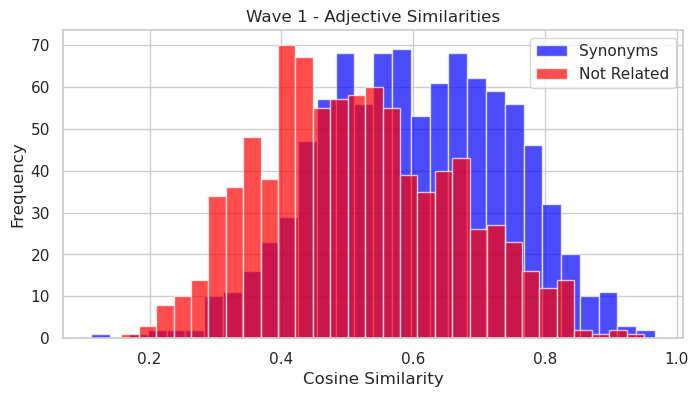

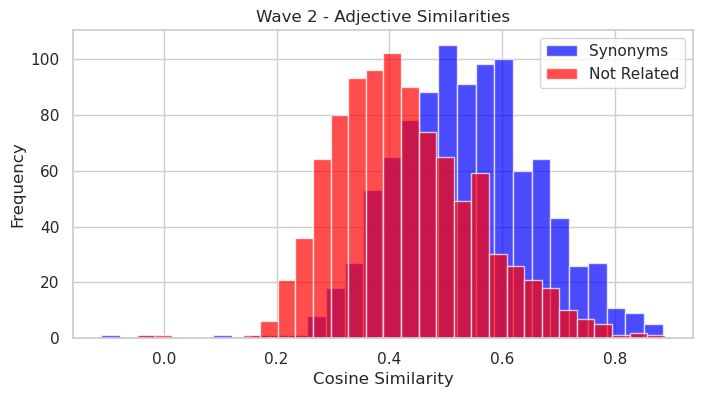

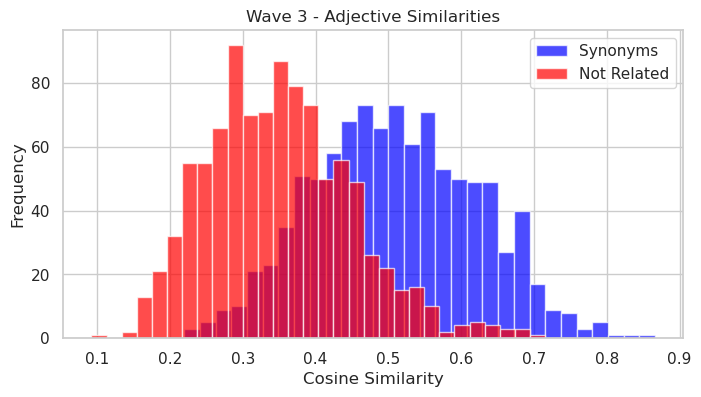

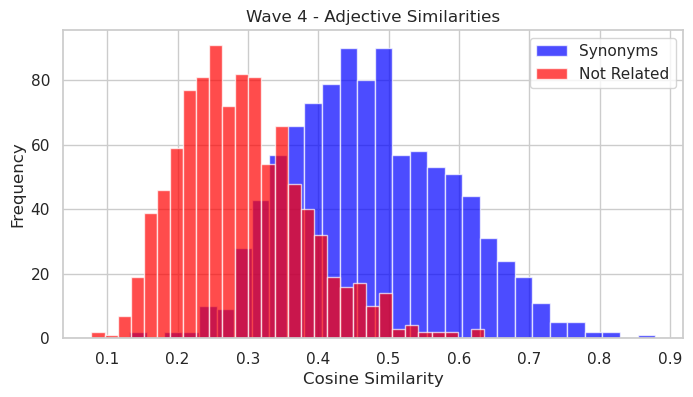

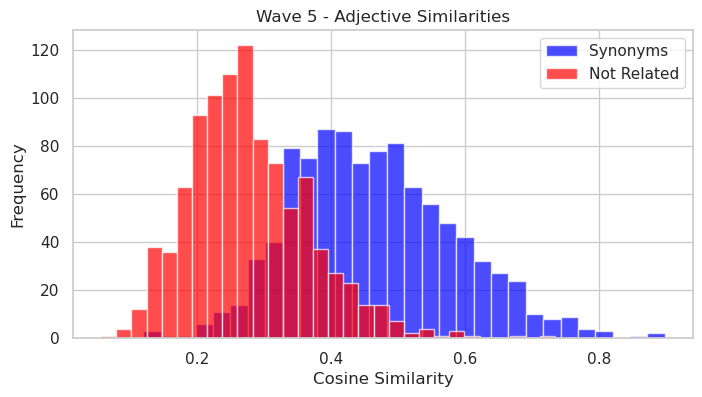

In [63]:
for i, wave in enumerate(waves_5):
    plot_similarity_histogram(
        wave, 
        syn_adj, 
        not_related_adj, 
        title=f"Wave {i + 1} - Adjective Similarities"
    )

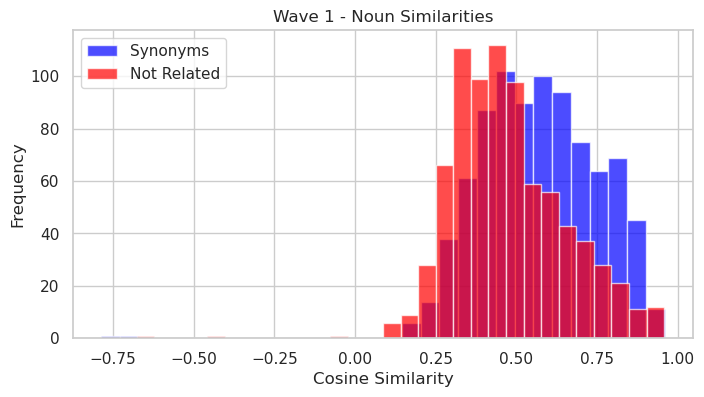

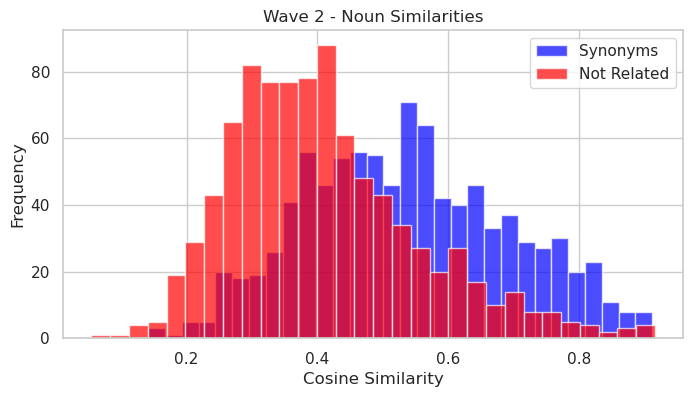

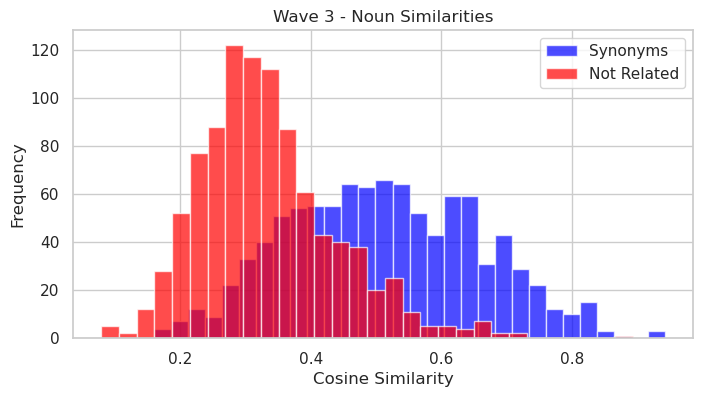

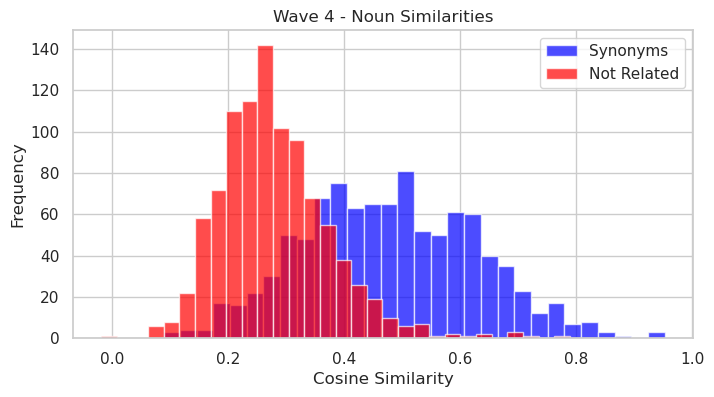

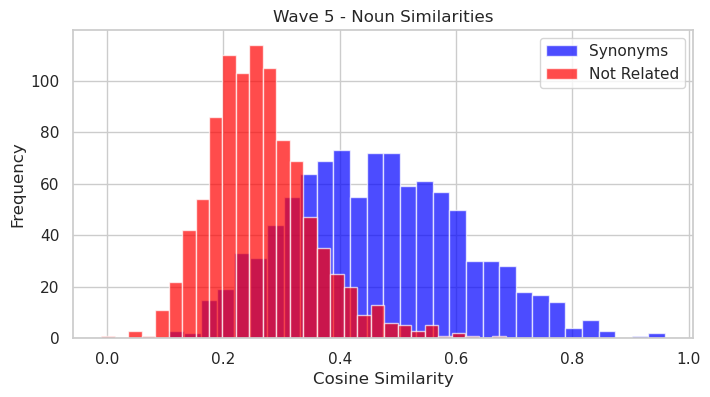

In [64]:
for i, wave in enumerate(waves_5):
    plot_similarity_histogram(
        wave, 
        syn_noun, 
        not_related_noun, 
        title=f"Wave {i + 1} - Noun Similarities"
    )

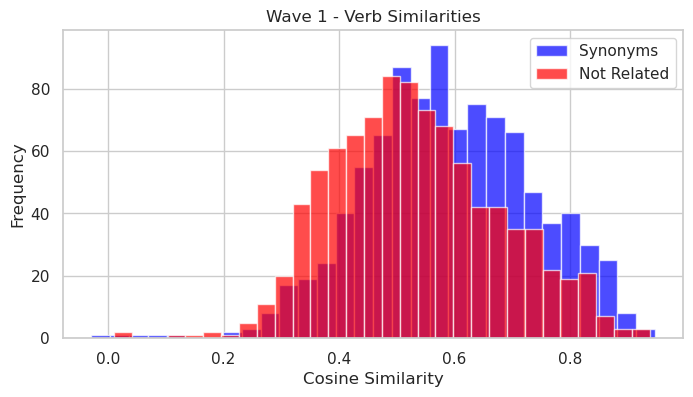

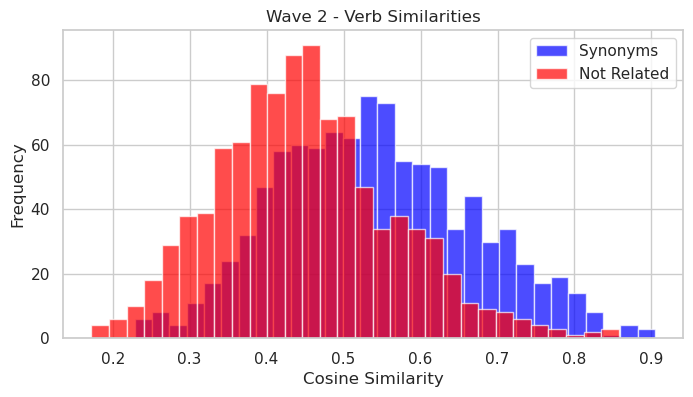

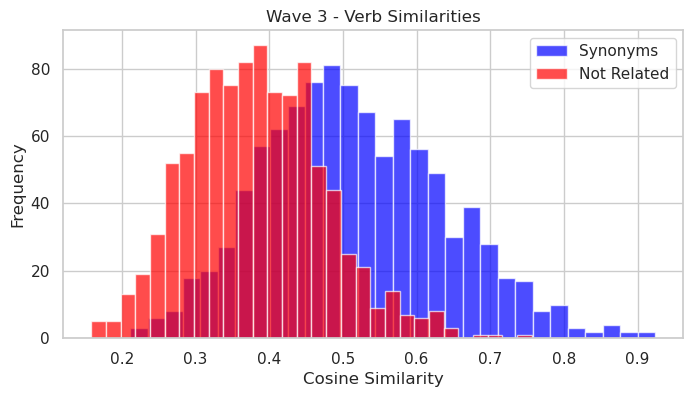

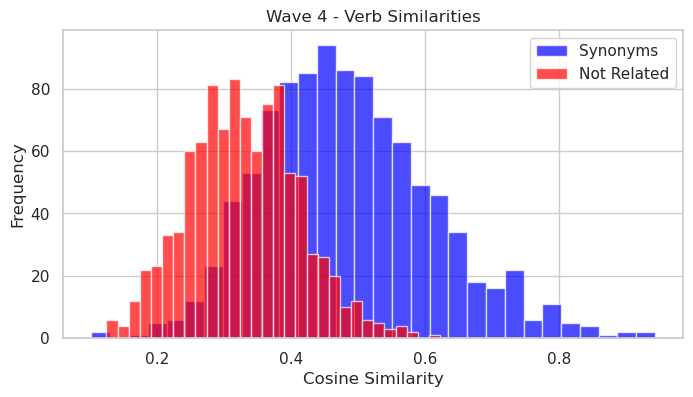

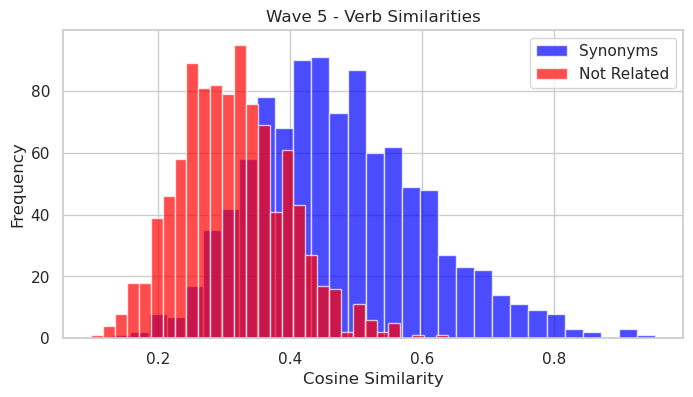

In [65]:
for i, wave in enumerate(waves_5):
    plot_similarity_histogram(
        wave, 
        syn_verb, 
        not_related_verb, 
        title=f"Wave {i + 1} - Verb Similarities"
    )